In [1]:
import sys
import os
import pickle

library_path = os.path.join('..', '..', 'UCB-USACE-LSTMs')
sys.path.insert(0, library_path)

from pathlib import Path
import pandas as pd

import matplotlib.pyplot as plt
import torch
from neuralhydrology.evaluation.metrics import *
from neuralhydrology.nh_run import start_run, eval_run, finetune
from neuralhydrology.utils.nh_results_ensemble import create_results_ensemble
from neuralhydrology.UCB_training.UCB_train import UCB_trainer
from neuralhydrology.evaluation.metrics import calculate_all_metrics

Quick check that working directory and train basin file exists:

In [2]:
print("Current Working Directory:", os.getcwd())
print("Train Basin File Exists:", os.path.exists("hopland"))

Current Working Directory: /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/hopland_all
Train Basin File Exists: True


In [3]:
path_to_csv = Path("/Users/mia/research/russian_river_data_folder/")
path_to_yaml = Path("hopland_gage.yaml")
params = {
    "epochs":32
}
lstmNoPhysics = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params)

In [4]:
lstmNoPhysics.train()

2024-11-29 16:14:41,527: Logging to /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/hopland_all/runs/testing_run_2911_161441/output.log initialized.
2024-11-29 16:14:41,528: ### Folder structure created at /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/hopland_all/runs/testing_run_2911_161441
2024-11-29 16:14:41,529: ### Run configurations for testing_run
2024-11-29 16:14:41,531: experiment_name: testing_run
2024-11-29 16:14:41,533: train_basin_file: hopland
2024-11-29 16:14:41,536: validation_basin_file: hopland
2024-11-29 16:14:41,599: test_basin_file: hopland
2024-11-29 16:14:41,603: train_start_date: 1994-10-01 00:00:00
2024-11-29 16:14:41,607: train_end_date: 2002-09-30 00:00:00
2024-11-29 16:14:41,610: validation_start_date: 2002-10-01 00:00:00
2024-11-29 16:14:41,648: validation_end_date: 2005-09-30 00:00:00
2024-11-29 16:14:41,650: test_start_date: 2005-10-01 00:00:00
2024-11-29 16:14:41,651: test_end_date: 2009-09-30 00:00:00
2024-11-29 16:14:41,653: device: cpu
2024-

Using basin: Hopland
Using target variable: NR HOPLAND FLOW COE HOP


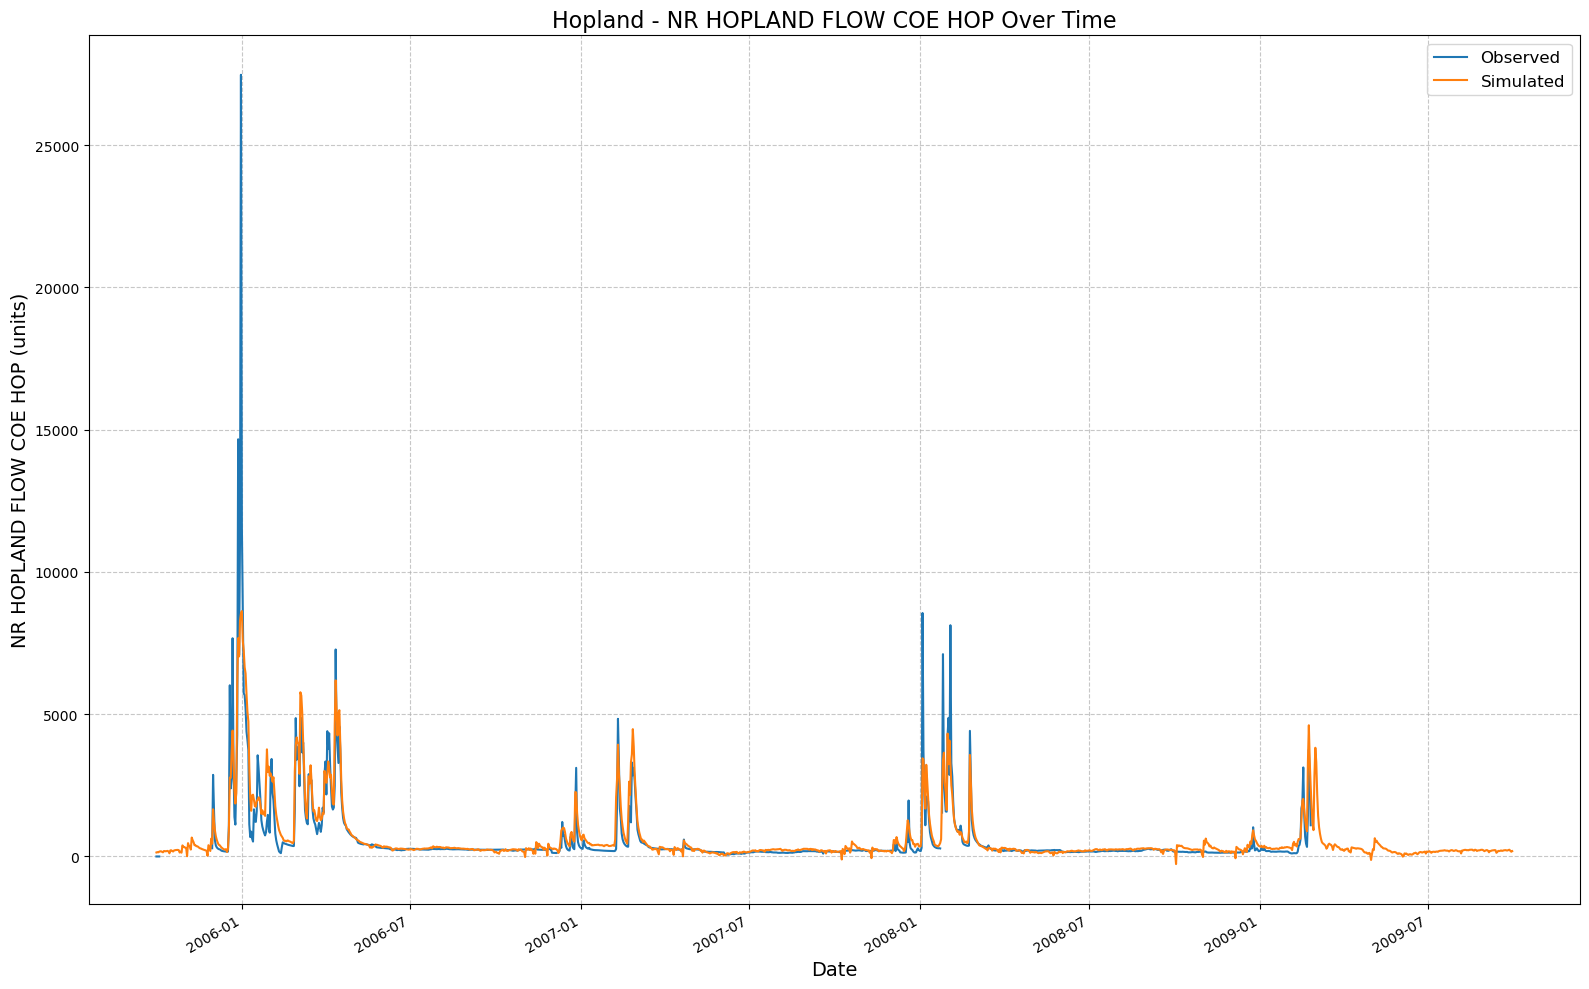

[INFO] CSV output saved at: /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/hopland_all/runs/testing_run_2911_161441/results_output.csv


{'NSE': 0.7234221696853638,
 'MSE': 547767.8125,
 'RMSE': 740.1133781387822,
 'KGE': 0.7124169567934352,
 'Alpha-NSE': 0.7775852723456,
 'Beta-KGE': 1.1110738515853882,
 'Beta-NSE': 0.0478576079705229,
 'Pearson-r': 0.8554375734972771,
 'FHV': -20.73136568069458,
 'FMS': 18.998042936877766,
 'FLV': 0.01818162128071576,
 'Peak-Timing': 0.25,
 'Peak-MAPE': 37.008795738220215}

In [5]:
lstmNoPhysics.results()

Now run physics informed lstm with HMS data:

In [8]:
path_to_csv = Path("/Users/mia/research/russian_river_data_folder/")
path_to_yaml = Path("hopland_gage.yaml")
path_to_physics_data = Path("/Users/mia/research/russian_river_data_folder/hopland.csv")
params = {
    "epochs":32
}
features_with_physics = [
    #from daily.csv
    "RUSSIAN 60 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 60 PRECIP-INC SCREENED",
    "RUSSIAN 70 PRECIP-INC SCREENED",
    "RUSSIAN 70 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "WF RUSSIAN PRECIP-INC SCREENED",
    "WF RUSSIAN ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    #from hopland.csv
    'Hopland Gage FLOW Hopland',
    'Russian 60 ET-POTENTIAL Hopland',
    'Russian 60 FLOW Hopland',
    'Russian 60 FLOW-BASE Hopland',
    'Russian 60 INFILTRATION Hopland',
    'Russian 60 PERC-SOIL Hopland',
    'Russian 60 SATURATION FRACTION Hopland',
    'Russian 70 ET-POTENTIAL Hopland',
    'Russian 70 FLOW Hopland',
    'Russian 70 FLOW-BASE Hopland',
    'Russian 70 INFILTRATION Hopland',
    'Russian 70 PERC-SOIL Hopland',
    'Russian 70 SATURATION FRACTION Hopland',
    'WF Russian ET-POTENTIAL Hopland',
    'WF Russian FLOW Hopland',
    'WF Russian FLOW-BASE Hopland',
    'WF Russian INFILTRATION Hopland',
    'WF Russian PERC-SOIL Hopland',
    'WF Russian SATURATION FRACTION Hopland',
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    "UKIAH CA FLOW USGS-MERGED",
    ]
lstmPhysics = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data)

In [9]:
lstmPhysics.train()

2024-11-29 16:19:11,229: Logging to /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/hopland_all/runs/testing_run_2911_161911/output.log initialized.
2024-11-29 16:19:11,231: ### Folder structure created at /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/hopland_all/runs/testing_run_2911_161911
2024-11-29 16:19:11,234: ### Run configurations for testing_run
2024-11-29 16:19:11,372: experiment_name: testing_run
2024-11-29 16:19:11,374: train_basin_file: hopland
2024-11-29 16:19:11,379: validation_basin_file: hopland
2024-11-29 16:19:11,381: test_basin_file: hopland
2024-11-29 16:19:11,383: train_start_date: 1994-10-01 00:00:00
2024-11-29 16:19:11,394: train_end_date: 2002-09-30 00:00:00
2024-11-29 16:19:11,395: validation_start_date: 2002-10-01 00:00:00
2024-11-29 16:19:11,397: validation_end_date: 2005-09-30 00:00:00
2024-11-29 16:19:11,405: test_start_date: 2005-10-01 00:00:00
2024-11-29 16:19:11,406: test_end_date: 2009-09-30 00:00:00
2024-11-29 16:19:11,409: device: cpu
2024-

Using basin: Hopland
Using target variable: NR HOPLAND FLOW COE HOP


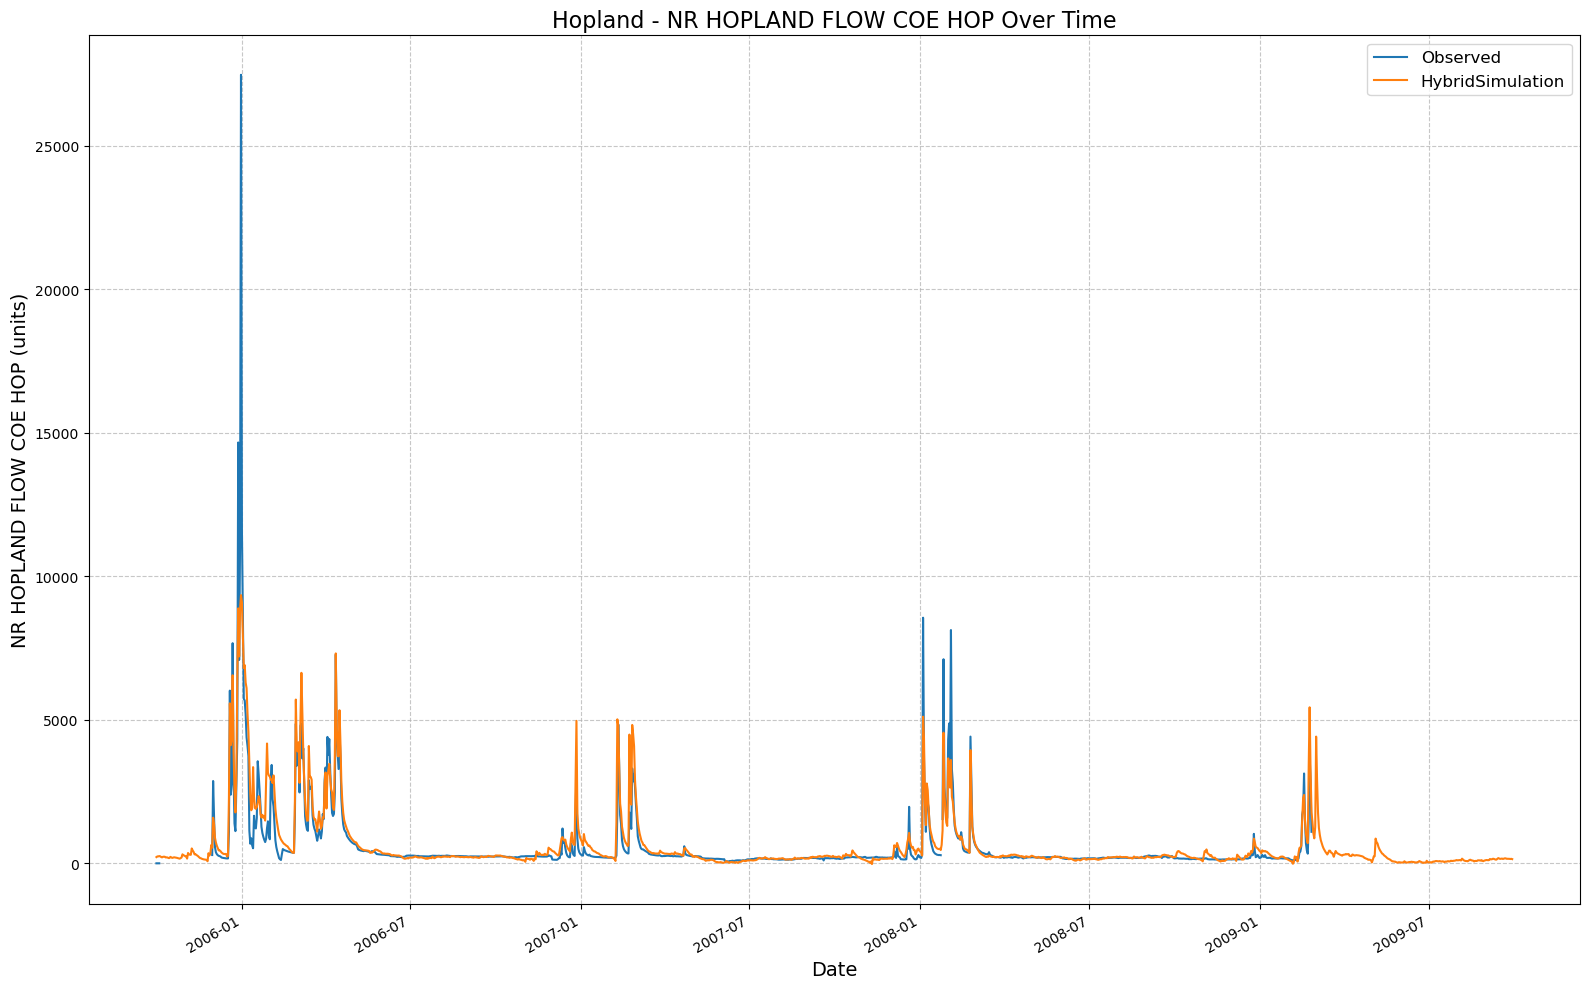

[INFO] CSV output saved at: /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/hopland_all/runs/testing_run_2911_161911/results_output.csv


{'NSE': 0.7530217170715332,
 'MSE': 489145.3125,
 'RMSE': 699.3892424823247,
 'KGE': 0.7600001457254149,
 'Alpha-NSE': 0.8416191482129045,
 'Beta-KGE': 1.1248509883880615,
 'Beta-NSE': 0.05379367401937377,
 'Pearson-r': 0.8698936337547608,
 'FHV': -14.67764526605606,
 'FMS': 46.100313662012084,
 'FLV': 0.2924382651374769,
 'Peak-Timing': 0.25,
 'Peak-MAPE': 30.467195510864258}

In [10]:
lstmPhysics.results()

Now, combine the results for the normal lstm, physics informed lstm and the hms results on one graph over a specified time period (the test period).

In [11]:
def combinedPlot(lstm_results: Path, lstmPhysics_results: Path, HMS_results: Path, title: str, 
                 test_start_date="01/10/2005", test_end_date="30/09/2009"):
    model1_df = pd.read_csv(lstm_results) #colums: Date, Observed, Predicted
    model2_df = pd.read_csv(lstmPhysics_results) #colums: Date, Observed, Predicted
    model1_df = model1_df.rename(columns={
        'Date': 'date',
        'Observed': 'Observed_Model1',
        'Predicted': 'Predicted_Model1'
    })
    model1_df['date'] = pd.to_datetime(model1_df['date'])

    model2_df = model2_df.rename(columns={
        'Date': 'date',
        'Observed': 'Observed_Model2',
        'Predicted': 'Predicted_Model2'
    })
    model2_df['date'] = pd.to_datetime(model2_df['date'])

    hms_df = pd.read_csv(HMS_results)
    hms_df = hms_df[3:]
    hms_df.columns = hms_df.columns.str.strip()
    hms_df = hms_df.drop(columns=['Ordinate'])
    hms_df = hms_df.rename(columns={'Date / Time': 'date'})
    hms_df['date'] = pd.to_datetime(hms_df['date'], format='%d-%b-%y')
    hms_df = hms_df.reset_index(drop=True)
    hms_df = hms_df.iloc[:, [0,1]] #Date, HMS predicted
    hms_df = hms_df.rename(columns={hms_df.columns[1]: "HMS_predicted"})
    hms_df["HMS_predicted"] = pd.to_numeric(hms_df["HMS_predicted"], errors="coerce")

    df = model1_df.merge(model2_df, how='right', on='date').merge(hms_df, how='right', on='date')

    # Filter for the test period
    test_start_date = pd.to_datetime("2005-10-01")
    test_end_date = pd.to_datetime("2009-09-30")
    df = df[(df['date'] >= test_start_date) & (df['date'] <= test_end_date)]

    # Plot all columns against the "date_col" (x-axis)
    plt.figure(figsize=(30, 10))
    
    plt.plot(df["date"], df["Observed_Model1"], label='Observed', color="blue", linewidth=1.5)
    plt.plot(df["date"], df["Predicted_Model1"], label='LSTM Prediction', color="purple", linewidth=1.5, alpha=0.8)
    plt.plot(df["date"], df["Predicted_Model2"], label='Physics Informed LSTM Prediction', color="orange", linewidth=1.5, alpha=0.8)
    plt.plot(df["date"], df["HMS_predicted"], label='HMS Prediction', color="lightblue", linewidth=1.2, alpha=0.6)

    # Customize the plot
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Inflow", fontsize=12)
    plt.title(title, fontsize=16)
    plt.legend(fontsize=10, loc="upper right")
    plt.grid(True, alpha=0.4)

    #plt.gcf.autofmt_xdate()
    plt.tight_layout()
    plt.show()

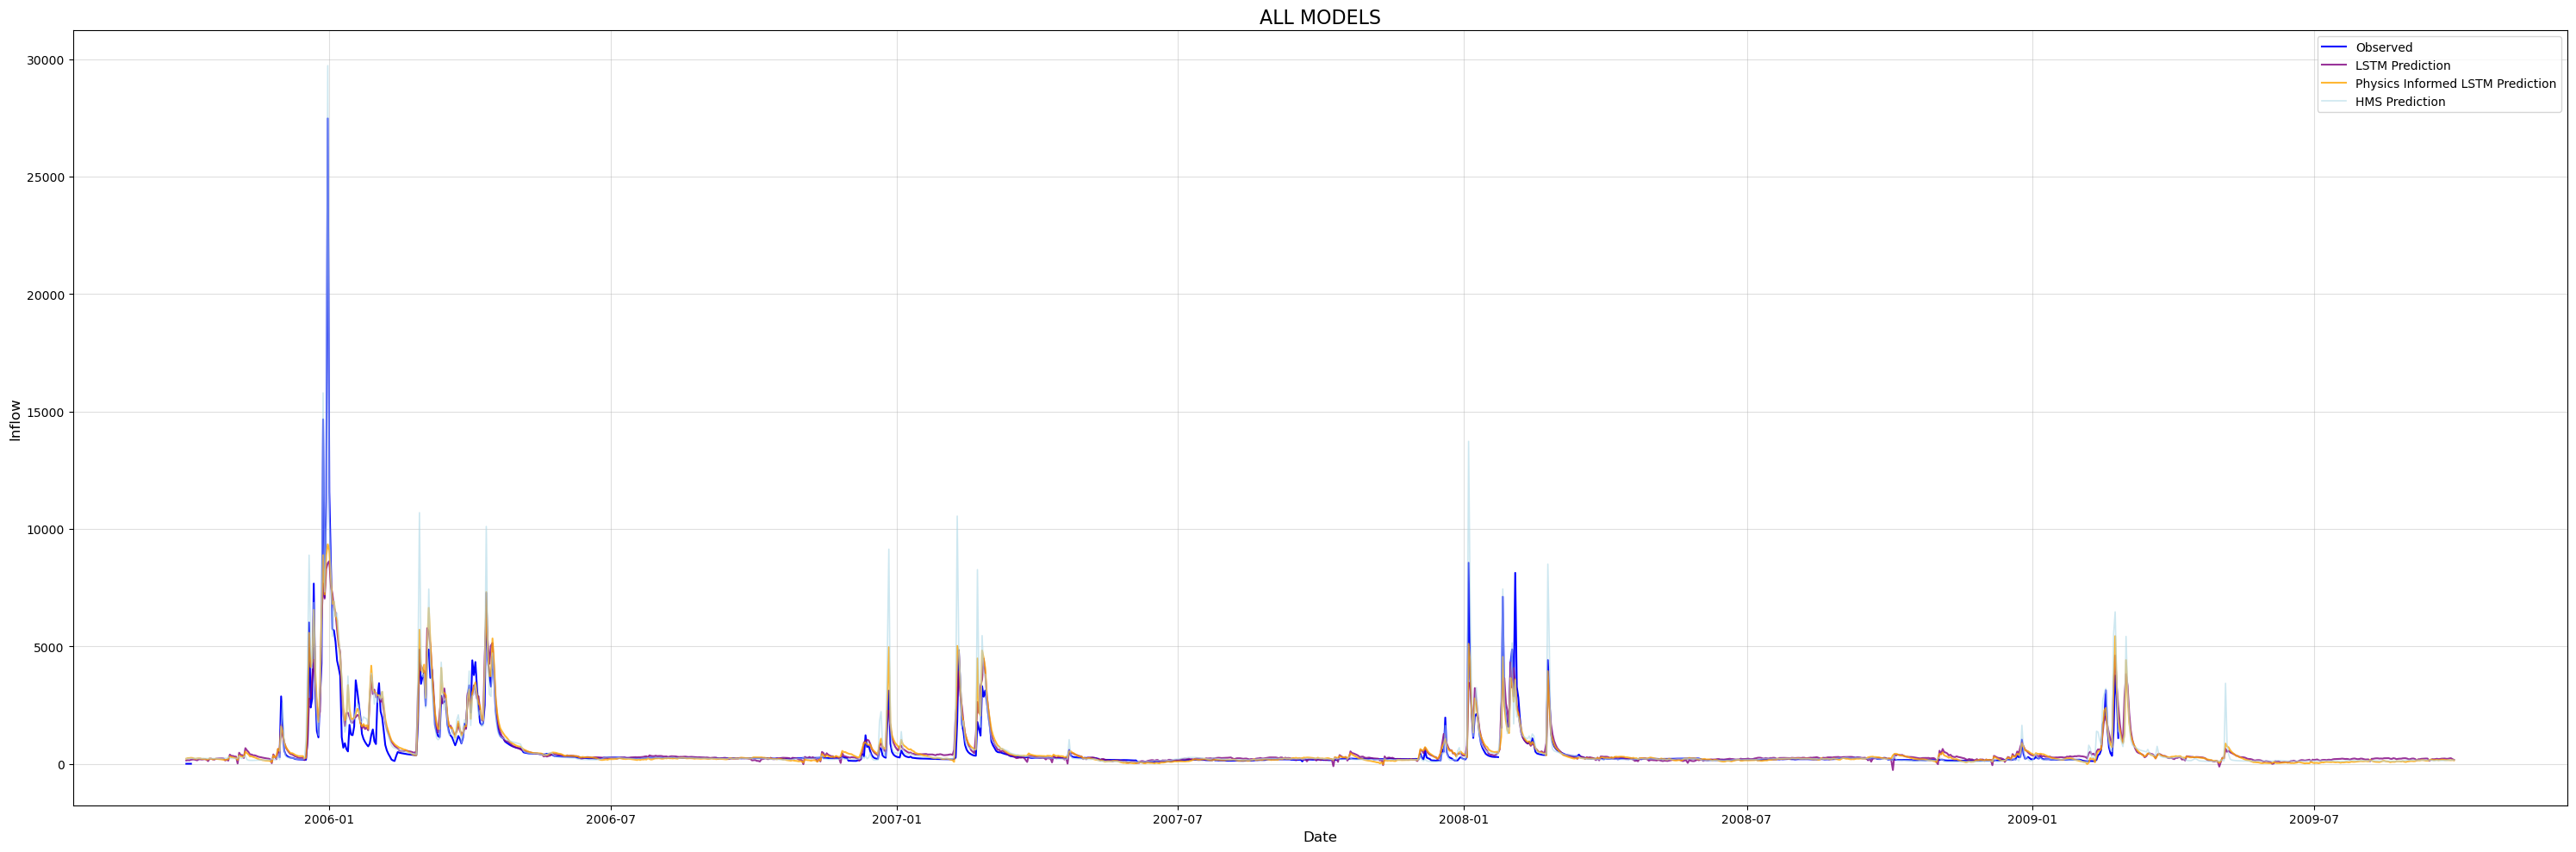

In [12]:
#change the paths to the respective ouptut csvs from running.result()
lstm_result_path = Path('/Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/hopland_all/runs/testing_run_2911_161441/results_output.csv')
physics_informed_result_path = Path('/Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/hopland_all/runs/testing_run_2911_161911/results_output.csv')
path_to_physics_data = Path("/Users/mia/research/russian_river_data_folder/hopland.csv")
combinedPlot(lstm_results=lstm_result_path, lstmPhysics_results= physics_informed_result_path, HMS_results=path_to_physics_data, title='ALL MODELS')